In [ ]:
#import libraries

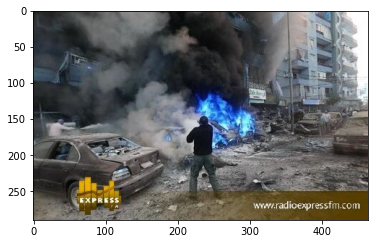

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import os
import cv2
from tqdm import tqdm

DATADIR = "C:\\Users\\Acer\\images"

CATEGORIES = ["Radical", "Non-Radical"]

for category in CATEGORIES:  
    path = os.path.join(DATADIR,category)  
    for img in os.listdir(path):  
        img_array = cv2.imread(os.path.join(path,img) ,cv2.IMREAD_COLOR)  # convert to array
        plt.imshow(img_array, cmap='gray')  # graph it
        plt.show()  # display!
        break  # we just want one for now so break
    break  #...and one more!

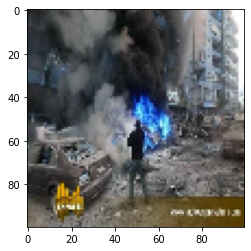

In [2]:
IMG_SIZE = 100
new_array = cv2.resize(img_array, (IMG_SIZE, IMG_SIZE))
plt.imshow(new_array, cmap='gray')
plt.show()

In [3]:
#loading dataset

In [4]:
training_data = []

def create_training_data():
    for category in CATEGORIES:  # do dogs and cats

        path = os.path.join(DATADIR,category)
        class_num = CATEGORIES.index(category)  

        for img in tqdm(os.listdir(path)):
            try:
                img_array = cv2.imread(os.path.join(path,img) ,cv2.IMREAD_GRAYSCALE)  # convert to array
                new_array = cv2.resize(img_array, (IMG_SIZE, IMG_SIZE))  # resize to normalize data size
                training_data.append([new_array, class_num])  # add this to our training_data
            except Exception as e:  # in the interest in keeping the output clean...
                pass
            #except OSError as e:
            #    print("OSErrroBad img most likely", e, os.path.join(path,img))
            #except Exception as e:
            #    print("general exception", e, os.path.join(path,img))

create_training_data()

print(len(training_data))


100%|██████████| 449/449 [00:03<00:00, 118.98it/s] 

1050


In [5]:
#pre-processing

In [6]:
X = []
y = []

for features,label in training_data:
    X.append(features)
    y.append(label)

print(X[0].reshape(-1, IMG_SIZE, IMG_SIZE, 1))

X = np.array(X).reshape(-1, IMG_SIZE, IMG_SIZE, 1)

[[[[ 33]
   [ 36]
   [ 39]
   ...
   [254]
   [255]
   [255]]

  [[ 34]
   [ 39]
   [ 44]
   ...
   [254]
   [255]
   [255]]

  [[ 38]
   [ 50]
   [ 50]
   ...
   [254]
   [255]
   [255]]

  ...

  [[ 94]
   [110]
   [110]
   ...
   [ 46]
   [ 46]
   [ 46]]

  [[109]
   [121]
   [115]
   ...
   [ 46]
   [ 46]
   [ 46]]

  [[114]
   [120]
   [110]
   ...
   [ 46]
   [ 46]
   [ 46]]]]


In [7]:
y=np.array(y) 

In [8]:
from sklearn.model_selection import train_test_split 
import matplotlib.image as mpimg
import matplotlib.pyplot as plt

In [9]:
#split for training and testing

In [10]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 3)

In [11]:
print(y_train)
print(y_test)

[1 0 0 0 0 0 0 1 0 0 0 0 1 0 1 0 0 0 0 1 1 0 0 0 0 0 0 0 0 0 0 0 1 0 1 0 1
 0 0 0 1 0 0 0 0 1 0 0 0 0 0 1 0 0 0 0 1 0 1 0 1 0 0 0 0 0 1 0 1 1 1 1 0 0
 1 1 1 1 0 0 0 1 0 0 0 1 0 0 1 1 0 1 1 0 0 0 0 0 0 1 1 1 0 1 1 1 0 0 0 1 1
 0 1 0 0 0 1 0 0 0 0 0 0 0 1 1 1 0 0 0 0 0 0 0 0 0 0 1 1 0 0 0 0 1 1 0 1 1
 0 0 0 0 1 0 1 0 0 1 1 0 0 1 0 0 0 0 0 1 0 0 0 1 0 1 0 1 1 0 0 0 1 0 0 0 1
 1 0 0 1 1 0 0 0 0 0 0 0 1 0 1 0 0 0 0 1 0 0 1 1 0 0 0 0 1 1 0 1 0 1 0 0 1
 0 1 1 1 1 0 0 1 1 0 0 1 0 0 1 1 0 1 1 1 0 0 0 0 1 0 0 0 0 1 0 1 0 1 1 0 1
 1 0 0 1 0 1 0 1 1 0 0 1 0 1 0 0 1 0 1 0 0 0 0 0 1 0 1 0 0 0 0 0 1 1 0 0 0
 0 1 0 0 1 0 1 1 0 0 0 1 1 0 0 0 0 0 1 1 1 0 1 1 0 0 1 0 1 0 0 1 0 0 0 1 1
 1 0 0 0 1 0 0 0 1 0 1 0 0 1 0 0 0 0 1 1 1 0 1 0 1 0 0 0 0 1 0 0 0 0 1 0 1
 0 0 1 0 0 0 1 0 0 0 1 0 1 0 0 1 1 0 1 0 0 0 0 0 0 1 1 0 0 0 0 1 1 1 0 0 1
 0 1 0 0 0 1 0 0 1 1 1 0 0 0 0 0 0 1 0 1 0 0 1 1 1 0 0 0 0 0 0 1 0 0 1 0 0
 1 0 0 1 0 0 1 1 1 0 0 0 1 0 1 1 0 1 1 1 1 0 0 1 0 0 0 0 0 0 0 1 0 0 1 1 0
 1 1 0 0 0 0 1 0 0 0 0 1 

In [12]:
X_train = X_train/255.0
X_test=X_test/255.0
X_train

array([[[[0.24705882],
         [0.27843137],
         [0.25490196],
         ...,
         [0.38039216],
         [0.28235294],
         [0.28627451]],

        [[0.96078431],
         [0.98823529],
         [0.62352941],
         ...,
         [0.21960784],
         [0.94509804],
         [0.7372549 ]],

        [[0.50980392],
         [0.92941176],
         [0.8       ],
         ...,
         [0.89411765],
         [0.25490196],
         [0.64313725]],

        ...,

        [[0.74509804],
         [0.25098039],
         [0.26666667],
         ...,
         [0.2627451 ],
         [0.94509804],
         [0.97254902]],

        [[0.24705882],
         [0.76078431],
         [0.8       ],
         ...,
         [0.56862745],
         [0.03921569],
         [0.03529412]],

        [[0.97647059],
         [0.01960784],
         [0.76862745],
         ...,
         [0.02352941],
         [0.06666667],
         [0.01176471]]],


       [[[0.7254902 ],
         [0.76862745],
         [0.69

In [13]:
#Perform data augmentation

In [14]:
import warnings
warnings.filterwarnings('ignore')
import numpy as np
import skimage.io as io
from skimage.transform import rotate, AffineTransform, warp
from skimage.util import random_noise
from skimage.filters import gaussian
import matplotlib.pyplot as plt
% matplotlib inline

UsageError: Line magic function `%` not found.


In [15]:
from tqdm import tqdm

In [16]:
final_train_data = []
final_target_train = []
for i in tqdm(range(X_train.shape[0])):
    final_train_data.append(X_train[i])
    final_train_data.append(rotate(X_train[i], angle=45, mode = 'wrap'))
    final_train_data.append(np.fliplr(X_train[i]))
    final_train_data.append(np.flipud(X_train[i]))
    final_train_data.append(random_noise(X_train[i],var=0.2**2))
    for j in range(5):
        final_target_train.append(y_train[i])

100%|██████████| 840/840 [00:02<00:00, 292.04it/s]


In [19]:
final_test_data = []
final_target_test = []
for i in tqdm(range(X_test.shape[0])):
    final_test_data.append(X_test[i])
    final_test_data.append(rotate(X_test[i], angle=45, mode = 'wrap'))
    final_test_data.append(np.fliplr(X_test[i]))
    final_test_data.append(np.flipud(X_test[i]))
    final_test_data.append(random_noise(X_test[i],var=0.2**2))
    for j in range(5):
        final_target_test.append(y_test[i])

100%|██████████| 210/210 [00:00<00:00, 310.84it/s]


In [20]:
print(len(final_target_train), len(final_train_data))
X_train = np.array(final_train_data)
y_train = np.array(final_target_train)

4200 4200


In [21]:
print(len(final_target_test), len(final_test_data))
X_test = np.array(final_test_data)
y_test = np.array(final_target_test)

1050 1050


In [22]:
print(y_test.shape,X_train.shape)
print(X_test.shape,y_train.shape)

(1050,) (4200, 100, 100, 1)
(1050, 100, 100, 1) (4200,)


In [23]:
#Training model

In [24]:
import tensorflow as tf
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout, Activation, Flatten
from tensorflow.keras.layers import Conv2D, MaxPooling2D

In [25]:


model = Sequential()

model.add(Conv2D(256, (3, 3), input_shape=X.shape[1:]))
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))

model.add(Conv2D(256, (3, 3)))
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))

model.add(Conv2D(256, (3, 3)))
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))

model.add(Flatten())  # this converts our 3D feature maps to 1D feature vectors

model.add(Dense(64))

model.add(Dense(1))
model.add(Activation('sigmoid'))

model.compile(loss='binary_crossentropy',
              optimizer='adam',
              metrics=['accuracy'])

model.fit(X_train, y_train, batch_size=64, epochs=12)

Epoch 1/12
66/66 [==============================] - 391s 6s/step - loss: 0.6469 - accuracy: 0.6581
Epoch 2/12
66/66 [==============================] - 320s 5s/step - loss: 0.5399 - accuracy: 0.7290
Epoch 3/12
66/66 [==============================] - 317s 5s/step - loss: 0.4747 - accuracy: 0.7767
Epoch 4/12
66/66 [==============================] - 339s 5s/step - loss: 0.4241 - accuracy: 0.8105
Epoch 5/12
66/66 [==============================] - 335s 5s/step - loss: 0.3847 - accuracy: 0.8293
Epoch 6/12
66/66 [==============================] - 332s 5s/step - loss: 0.3185 - accuracy: 0.8595
Epoch 7/12
66/66 [==============================] - 317s 5s/step - loss: 0.2442 - accuracy: 0.8933
Epoch 8/12
66/66 [==============================] - 321s 5s/step - loss: 0.1775 - accuracy: 0.9295
Epoch 9/12
66/66 [==============================] - 322s 5s/step - loss: 0.1300 - accuracy: 0.9490
Epoch 10/12
66/66 [==============================] - 394s 6s/step - loss: 0.1106 - accuracy: 0.9555
Epoch 11/

In [35]:
model.save('Trainedfinal.model')

INFO:tensorflow:Assets written to: Trainedfinal.model\assets


In [ ]:
#saved model

In [21]:
import pickle

pickle_out = open("X_train.pickle","wb")
pickle.dump(X_train, pickle_out)
pickle_out.close()

pickle_out = open("X_test.pickle","wb")
pickle.dump(X_test, pickle_out)
pickle_out.close()

pickle_out = open("y_train.pickle","wb")
pickle.dump(y_train, pickle_out)
pickle_out.close()

pickle_out = open("X.pickle","wb")
pickle.dump(X, pickle_out)
pickle_out.close()

In [15]:
import pickle
pickle_in = open("X_train.pickle","rb")
X_train = pickle.load(pickle_in)

pickle_in = open("X_test.pickle","rb")
X_test = pickle.load(pickle_in)

pickle_in = open("y_train.pickle","rb")
y_train = pickle.load(pickle_in)

pickle_in = open("y_test.pickle","rb")
y_test = pickle.load(pickle_in)

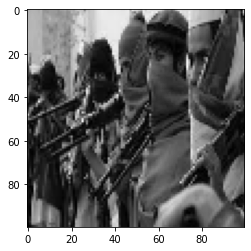

In [32]:
plt.imshow(X_test[3], cmap='gray')
plt.show()

[[ True]]


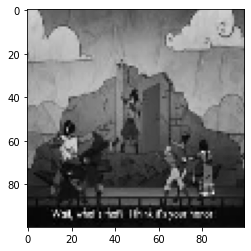

[[ True]]


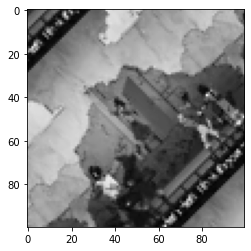

[[ True]]


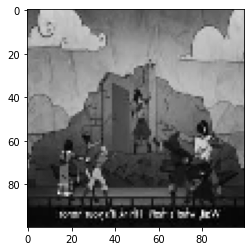

[[ True]]


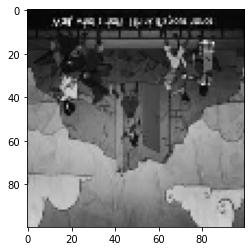

[[False]]


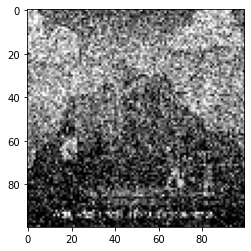

[[False]]


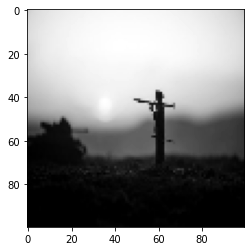

[[False]]


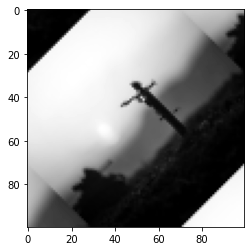

[[False]]


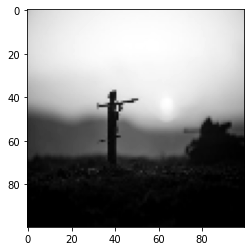

[[ True]]


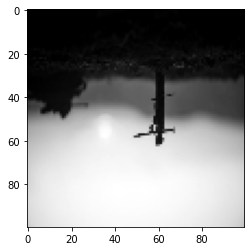

[[False]]


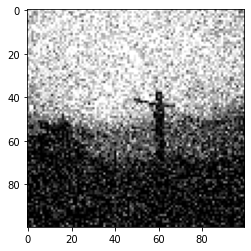

[[ True]]


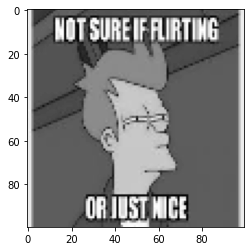

[[ True]]


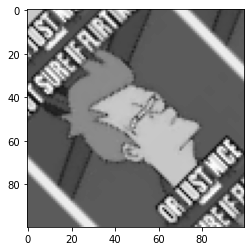

[[ True]]


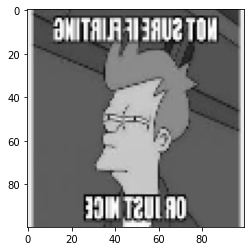

[[ True]]


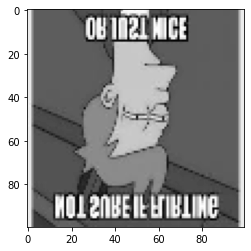

[[ True]]


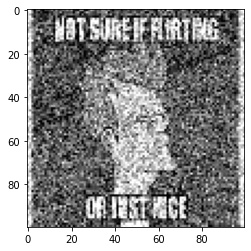

[[ True]]


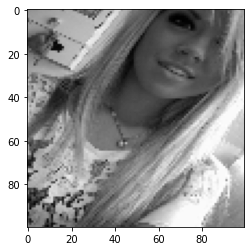

[[ True]]


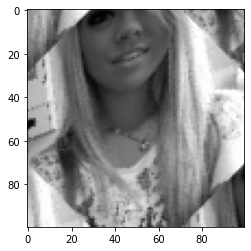

[[ True]]


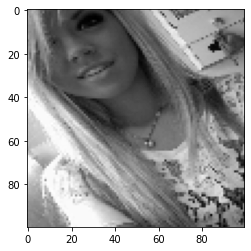

[[ True]]


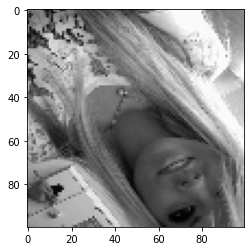

[[False]]


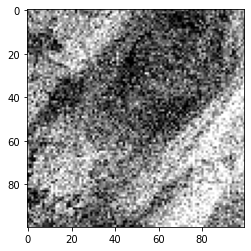

[[ True]]


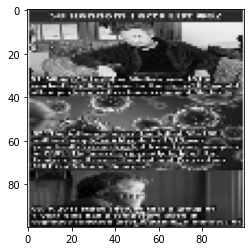

[[ True]]


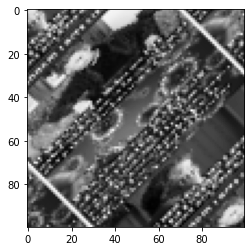

[[ True]]


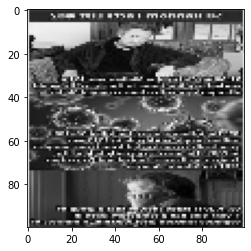

[[ True]]


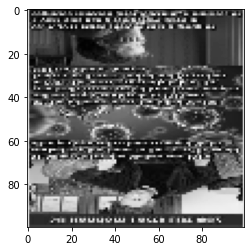

[[ True]]


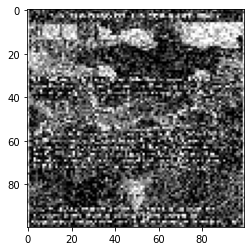

[[ True]]


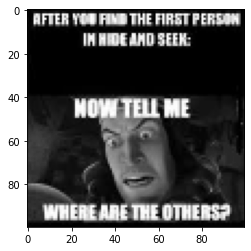

[[ True]]


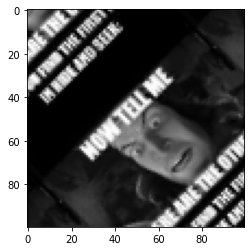

[[ True]]


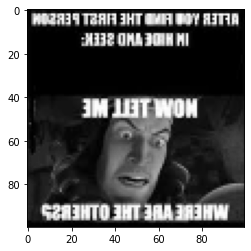

[[ True]]


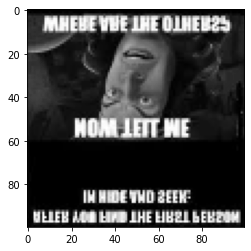

[[ True]]


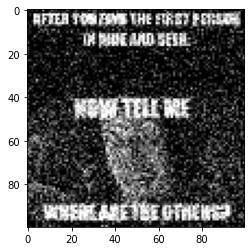

[[ True]]


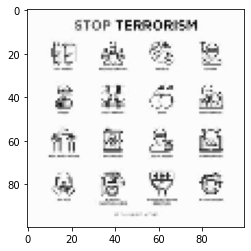

[[ True]]


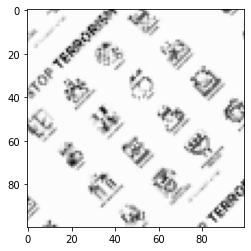

[[ True]]


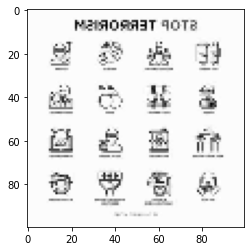

[[False]]


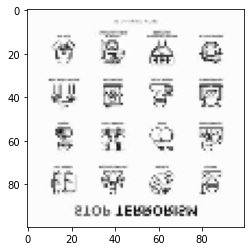

[[False]]


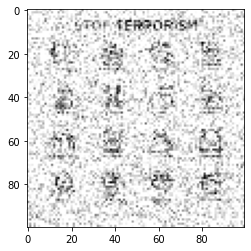

[[False]]


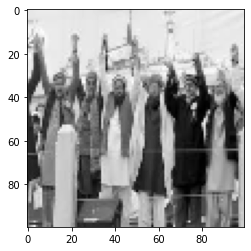

[[False]]


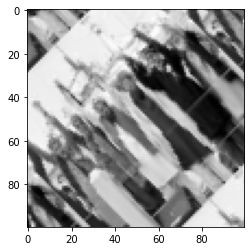

[[False]]


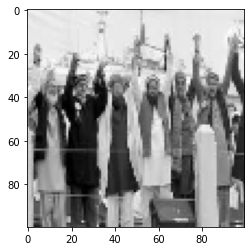

[[False]]


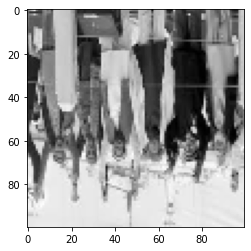

[[False]]


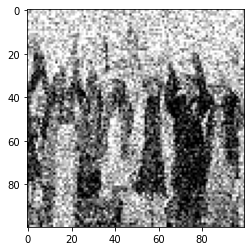

[[ True]]


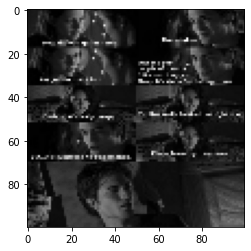

[[ True]]


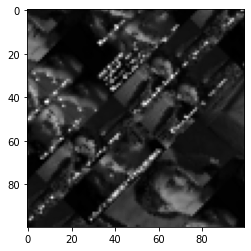

[[ True]]


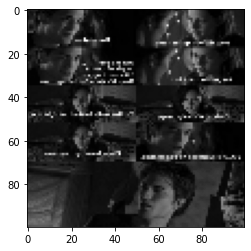

[[ True]]


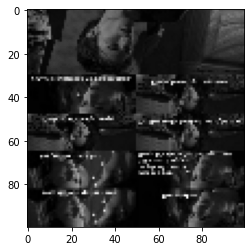

[[ True]]


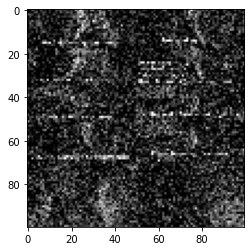

[[False]]


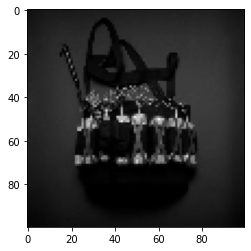

[[False]]


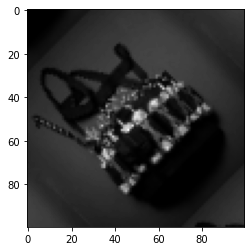

[[False]]


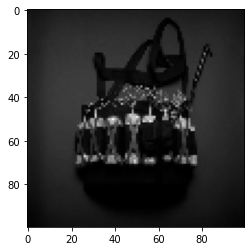

[[False]]


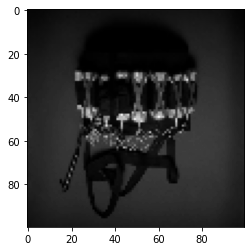

[[ True]]


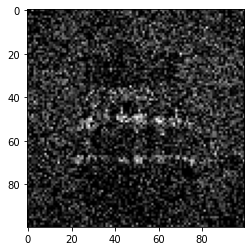

[[False]]


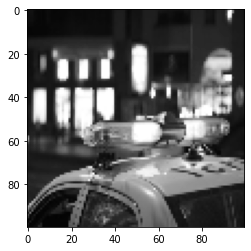

[[False]]


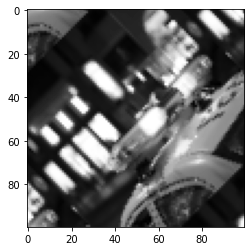

[[False]]


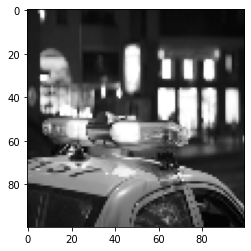

[[False]]


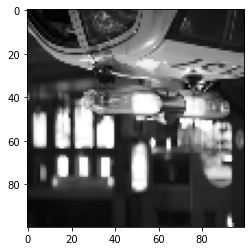

[[False]]


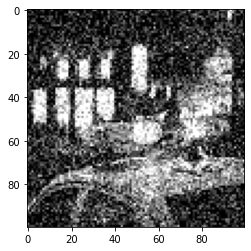

[[ True]]


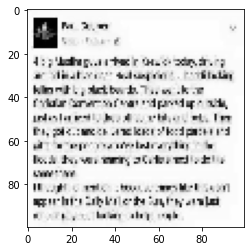

[[False]]


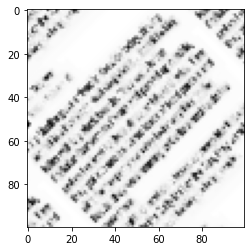

[[ True]]


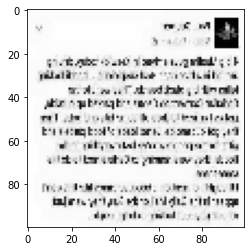

[[ True]]


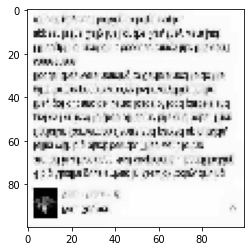

[[ True]]


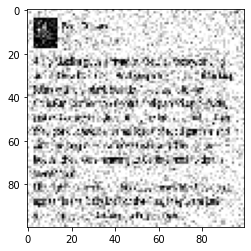

[[ True]]


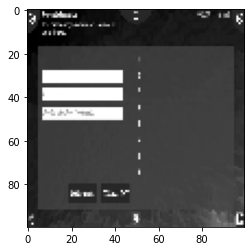

[[ True]]


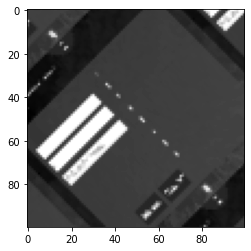

[[ True]]


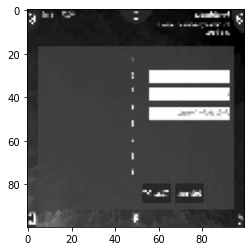

[[ True]]


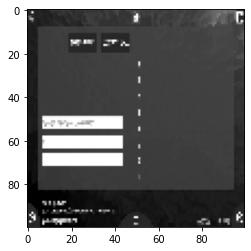

[[ True]]


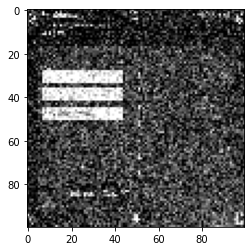

[[False]]


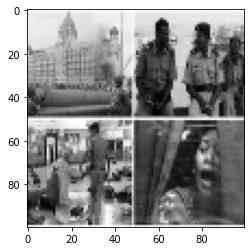

[[False]]


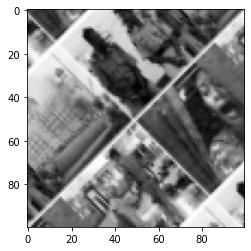

[[False]]


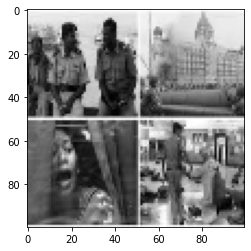

[[False]]


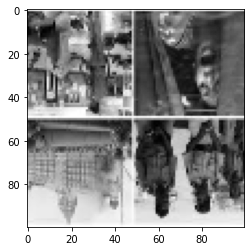

[[False]]


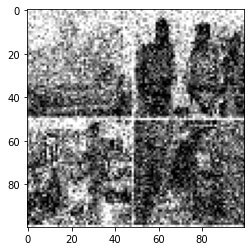

[[ True]]


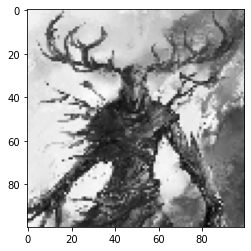

[[ True]]


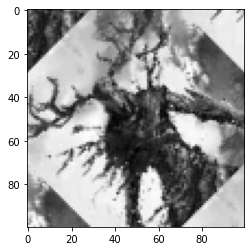

[[ True]]


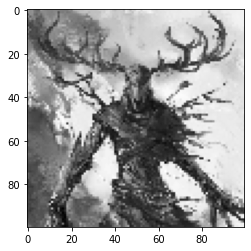

[[ True]]


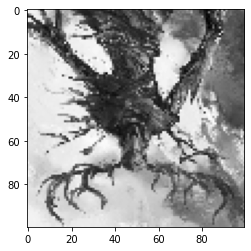

[[ True]]


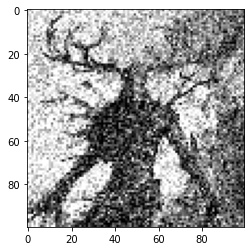

[[False]]


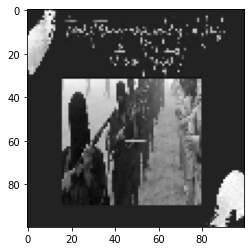

[[False]]


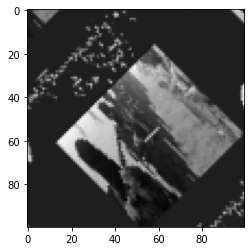

[[False]]


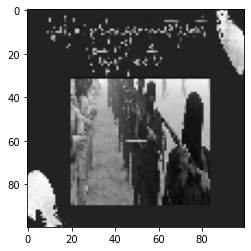

[[False]]


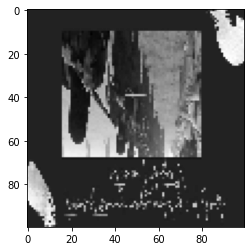

[[False]]


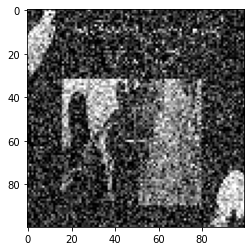

[[ True]]


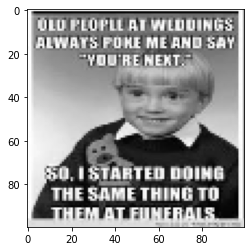

[[ True]]


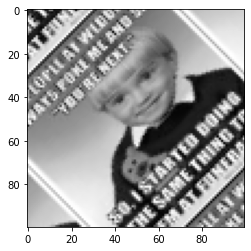

[[ True]]


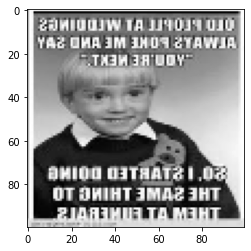

[[ True]]


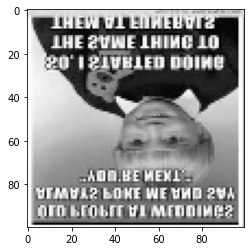

[[ True]]


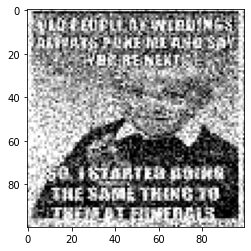

[[False]]


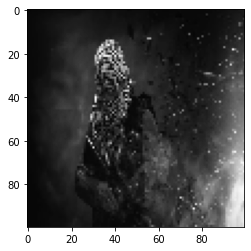

[[False]]


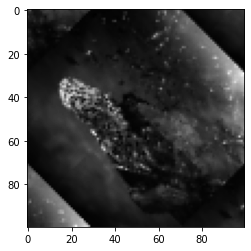

[[False]]


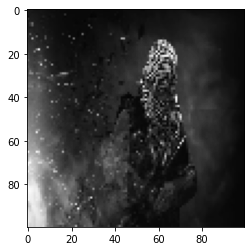

[[False]]


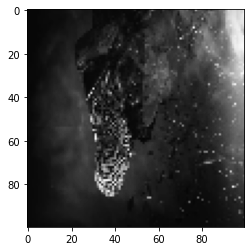

[[False]]


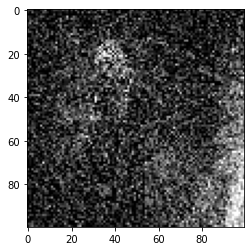

[[ True]]


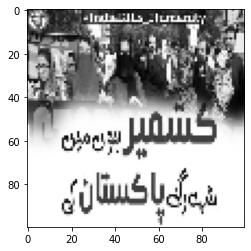

[[False]]


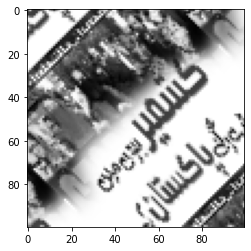

[[ True]]


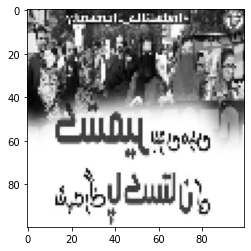

[[ True]]


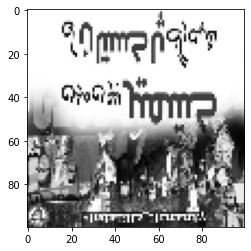

[[ True]]


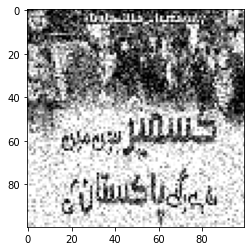

[[False]]


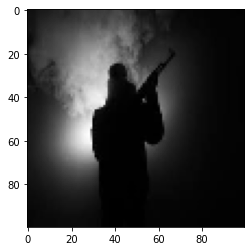

[[False]]


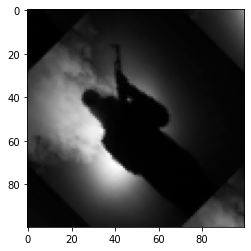

[[False]]


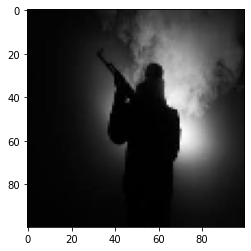

[[False]]


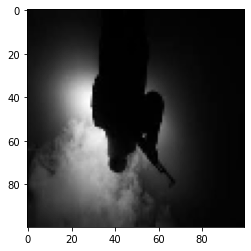

[[False]]


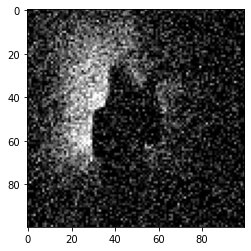

In [26]:
for i in range(100):
    y_pred = model.predict(X_test[i].reshape(-1,100,100,1))
    y_pred = (y_pred > 0.5)
    print(y_pred)
    plt.imshow(X_test[i], cmap='gray')
    plt.show()
    

In [31]:

m_pred = model.predict(X_test.reshape(-1,100,100,1))
m_pred = (m_pred >= 0.5)
print(m_pred)

[[ True]
 [ True]
 [ True]
 ...
 [False]
 [False]
 [False]]


In [33]:
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix
conf_matrix = confusion_matrix(y_test,m_pred)
print(conf_matrix)

[[520 105]
 [105 320]]


In [34]:
from sklearn.metrics import accuracy_score
accuracy = accuracy_score(m_pred, y_test)
print('Accuracy: %.2f' % (accuracy*100))

Accuracy: 80.00


narendramodi


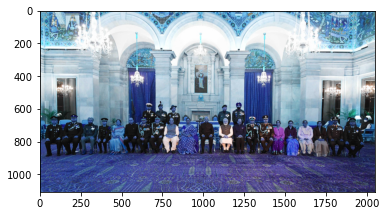

100%|██████████| 27/27 [00:03<00:00,  7.19it/s]


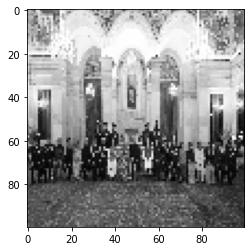

[[False]]


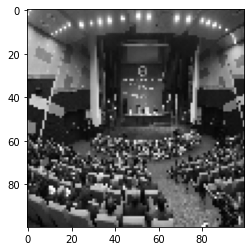

[[ True]]


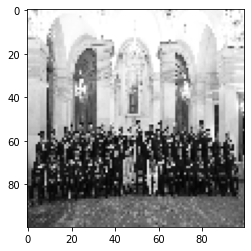

[[False]]


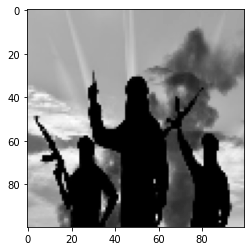

[[False]]


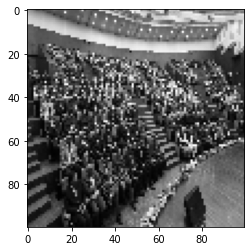

[[False]]


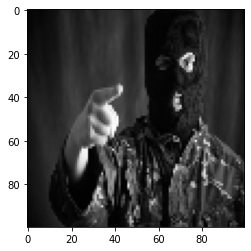

[[False]]


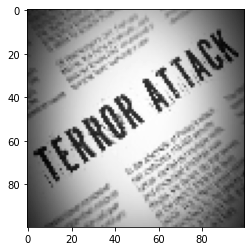

[[False]]


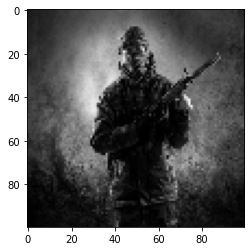

[[False]]


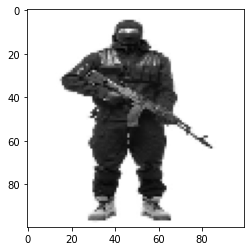

[[False]]


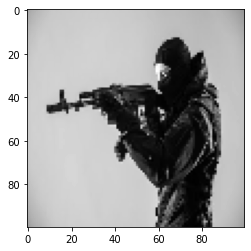

[[False]]


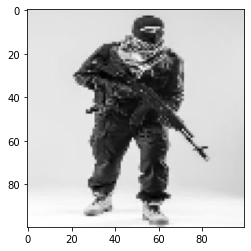

[[False]]


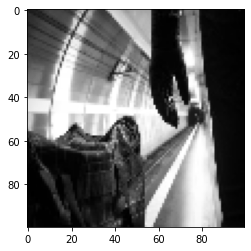

[[False]]


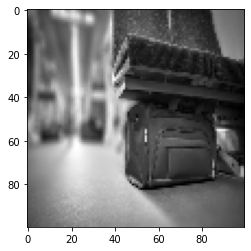

[[False]]


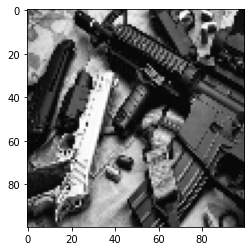

[[False]]


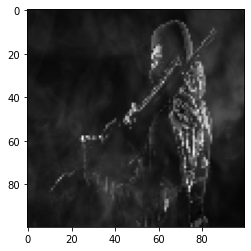

[[ True]]


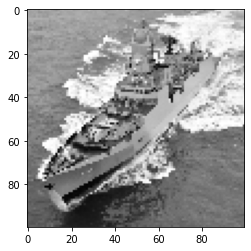

[[False]]


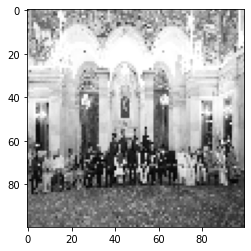

[[False]]


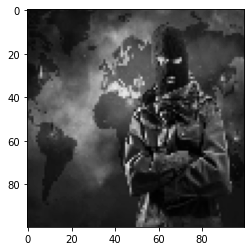

[[False]]


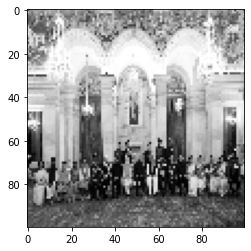

[[False]]


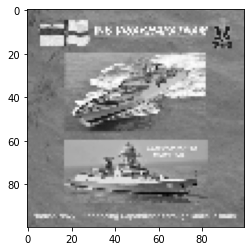

[[ True]]


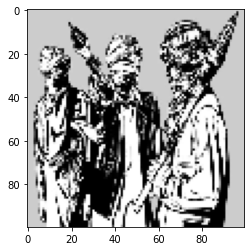

[[False]]


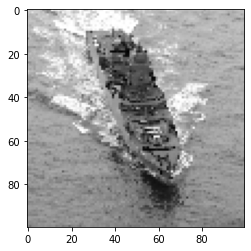

[[False]]


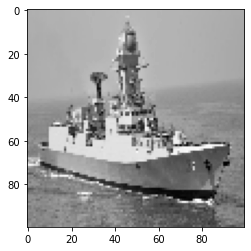

[[ True]]


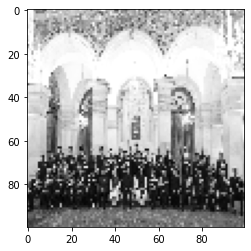

[[ True]]


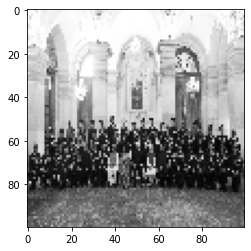

[[False]]


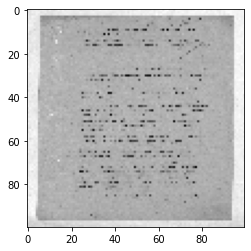

[[False]]


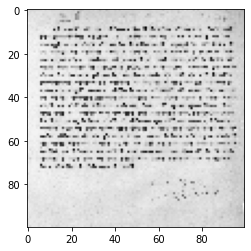

[[False]]
Radicalization quotient: 0.8148148148148148
Non-radical score: 0.18518518518518517


In [36]:
username=input()
DIR = "C:\\Users\\Acer\\Desktop\\resources\\"+username
path = os.path.join(DIR)  
IMG_SIZE = 100
t=0
f=0
for img in os.listdir(path):
    img_array = cv2.imread(os.path.join(path,img) ,cv2.IMREAD_COLOR)  # convert to array
    plt.imshow(img_array, cmap='gray')  # graph it
    plt.show()  # display!

    break  # we just want one for now so break

user_data = []
for img in tqdm(os.listdir(path)):
            try:
                img_array = cv2.imread(os.path.join(path,img) ,cv2.IMREAD_GRAYSCALE)  # convert to array
                new_array = cv2.resize(img_array, (IMG_SIZE, IMG_SIZE))  # resize to normalize data size
                user_data.append(new_array)  # add this to our training_data
            except Exception as e:  # in the interest in keeping the output clean...
                pass
            
idata= np.array(user_data).reshape(-1, IMG_SIZE, IMG_SIZE, 1)
for i in range(27):
    plt.imshow(user_data[i], cmap='gray')
    plt.show()
    m_pred = model.predict(idata[i].reshape(-1,100,100,1))
    m_pred = (m_pred > 0.5)
    print(m_pred)
    if m_pred==True:
        t=t+1 
    else:
        f=f+1
        
RQ=f/(f+t)
rq=t/(t+f)

print("Radicalization quotient:", RQ)
print("Non-radical score:", rq)

In [39]:
RQ=f/(f+t)
w=t/(t+f)

print("Radicalization quotient:", RQ)
print("Non-radical score:", w)


Radicalization quotient: 0.6666666666666666
Non-radical score: 0.3333333333333333
